# <font color='blue'> Ciclo-1 end to end </font>

## 1.0 Data Informations

### 1.1 IMPORTS

In [1]:
import random


import numpy            as np
import pandas           as pd
import matplotlib       as plt
import seaborn          as sns 



from      scikitplot   import              metrics                  as     mt
from      sklearn      import              metrics                  as     m
from      sklearn      import              preprocessing            as     pp
from      keras        import              layers                   as     l
from      keras        import              models                   as     ml
from      sklearn      import              model_selection          as     ms

### 1.2 Helper functions

### 1.3 Loading data

In [2]:
# Training data
data_raw    = pd.read_csv('dataset/training_users.csv', low_memory=True)

In [3]:
# Sessions data
df_sessions = pd.read_csv('dataset/sessions.csv',low_memory=True)

## 2.0 Data Description 

### 2.1 Data Dimentions

#### 2.1.1 Data Training 

In [4]:
df1 = data_raw.copy()

In [5]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


#### 2.1.2 Data Sessions

In [6]:
dfs_1 = df_sessions.copy()

In [7]:
print( 'Number of rows: {}'.format( dfs_1.shape[0] ) )
print( 'Number of columns: {}'.format( dfs_1.shape[1] ) )

Number of rows: 10567737
Number of columns: 6


### 2.2 Data Type

In [8]:
# ================Dtypes Data Training================= # 
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [9]:
# ================Dtypes Data Sessions================= #
dfs_1.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

### 2.3 NA Check

In [10]:
# ================Data Sessions================= #
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [11]:
# ================Data Sessions================= #
dfs_1.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [12]:
# Fill NA

##==================================      Users       ==================================##
# date_first_booking
date_first_booking_max = pd.to_datetime(df1['date_first_booking']).max().strftime( '%Y-%m-%d' )
df1['date_first_booking'] = df1['date_first_booking'].fillna(date_first_booking_max)
# age
avg_age = df1['age'].mean().astype(int)
df1['age'] = df1['age'].fillna(avg_age)
# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]

##==================================      Sessions       ==================================##
# user_id
dfs_1 = dfs_1[~dfs_1['user_id'].isna()]
# action
dfs_1 = dfs_1[~dfs_1['action'].isna()]
# action_type
dfs_1 = dfs_1[~dfs_1['action_type'].isna()]
# action_detail
dfs_1 = dfs_1[~dfs_1['action_detail'].isna()]
# secs_elapsed
dfs_1 = dfs_1[~dfs_1['secs_elapsed'].isna()]

In [13]:
##==================================      Users       ==================================##
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [14]:
##==================================      Sessions       ==================================##
dfs_1.isna().sum()/len(dfs_1)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

### 2.4 Change data types

In [15]:
#date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

#timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'] )

#date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

#age
df1['age'] = df1['age'].astype( int )

### 2.5 Check balanced data

In [16]:
df1['country_destination'].value_counts( normalize=True )

NDF      0.579673
US       0.294461
other    0.048128
FR       0.023623
IT       0.013458
GB       0.011066
ES       0.010671
CA       0.006707
DE       0.005020
NL       0.003621
AU       0.002541
PT       0.001032
Name: country_destination, dtype: float64

## 3.0 Data filtering

In [17]:
df2 = df1.copy()

### 3.1 Filtering rows

### 3.2 Columns selection

## 4.0 Data Preparation 

In [18]:
df3 = df2.copy()

In [19]:
#dummy variable
df3_dummy =   pd.get_dummies( df3.drop ( ['id','country_destination'] , axis=1 ) ) 

#join id and country destination
df3 = pd.concat( [df3 [['id','country_destination']] ,df3_dummy], axis=1 )

## 5.0 Feature Selection

In [20]:
cols_drop = ['date_account_created','timestamp_first_active','date_first_booking']
df4 = df3.drop( cols_drop, axis=1 )

In [21]:
X = df4.drop( 'country_destination', axis=1 )
y = df4['country_destination'].copy()

In [22]:
# split dataset into training and test
X_train, X_test,y_train, y_test =  ms.train_test_split( X , y, test_size=0.2, random_state=32 )

## 6.0 Machine Learning Model

In [23]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

### 6.1 Baseline Model

In [24]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()
#Model
y_hat_random = random.choices( population=country_destination_list,
                              weights = country_destination_weights,
                              k=k_num)
len(y_hat_random)

41478

Accuracy :0.42309175948695693
Balanced accuracy : 0.08260972901803255
kappa score : -0.007159527835014945
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       111
          CA       0.01      0.01      0.01       281
          DE       0.00      0.00      0.00       215
          ES       0.02      0.02      0.02       428
          FR       0.02      0.02      0.02      1021
          GB       0.01      0.01      0.01       426
          IT       0.02      0.02      0.02       570
         NDF       0.57      0.58      0.58     23996
          NL       0.01      0.01      0.01       146
          PT       0.00      0.00      0.00        48
          US       0.29      0.29      0.29     12280
       other       0.05      0.05      0.05      1956

    accuracy                           0.42     41478
   macro avg       0.08      0.08      0.08     41478
weighted avg       0.42      0.42      0.42     41478



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

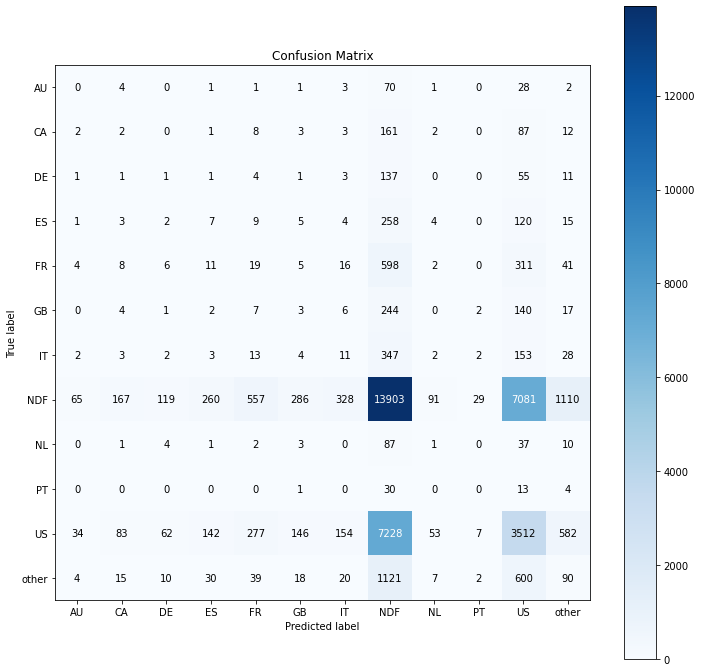

In [25]:
acc_random = m.accuracy_score( y_test, y_hat_random )
print('Accuracy :{}'.format(acc_random ) )

# Balanced accuracy
balanced_accuracy_random = m.balanced_accuracy_score(y_test, y_hat_random)
print('Balanced accuracy : {}'.format( balanced_accuracy_random ))


# Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, y_hat_random)
print('kappa score : {}'.format( kappa_random ))

# classification report
print(m.classification_report( y_test, y_hat_random ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test, y_hat_random, normalize=False , figsize=(12,12) )


### 6.1 Neural Network -MLP

In [26]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [27]:
#model definition
model = ml.Sequential()
model.add( l.Dense( 256, input_dim= x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 12, activation='softmax' ) )

#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

#train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
5185/5185 [==============================] - 5s 956us/step - loss: 1.2883 - accuracy: 0.5718
Epoch 2/100
5185/5185 [==============================] - 5s 918us/step - loss: 1.1360 - accuracy: 0.6121
Epoch 3/100
5185/5185 [==============================] - 5s 920us/step - loss: 1.0994 - accuracy: 0.6179
Epoch 4/100
5185/5185 [==============================] - 5s 937us/step - loss: 1.0916 - accuracy: 0.6190
Epoch 5/100
5185/5185 [==============================] - 5s 942us/step - loss: 1.0847 - accuracy: 0.6223
Epoch 6/100
5185/5185 [==============================] - 5s 929us/step - loss: 1.0861 - accuracy: 0.6225
Epoch 7/100
5185/5185 [==============================] - 5s 929us/step - loss: 1.0857 - accuracy: 0.6208
Epoch 8/100
5185/5185 [==============================] - 5s 923us/step - loss: 1.0807 - accuracy: 0.6239
Epoch 9/100
5185/5185 [==============================] - 5s 928us/step - loss: 1.0825 - accuracy: 0.6198
Epoch 10/100
5185/5185 [==============================]

5185/5185 [==============================] - 3s 649us/step - loss: 1.0607 - accuracy: 0.6307
Epoch 79/100
5185/5185 [==============================] - 3s 648us/step - loss: 1.0666 - accuracy: 0.6267
Epoch 80/100
5185/5185 [==============================] - 3s 652us/step - loss: 1.0670 - accuracy: 0.6248
Epoch 81/100
5185/5185 [==============================] - 3s 641us/step - loss: 1.0689 - accuracy: 0.6260
Epoch 82/100
5185/5185 [==============================] - 3s 649us/step - loss: 1.0662 - accuracy: 0.6271
Epoch 83/100
5185/5185 [==============================] - 3s 653us/step - loss: 1.0659 - accuracy: 0.6277
Epoch 84/100
5185/5185 [==============================] - 3s 646us/step - loss: 1.0648 - accuracy: 0.6279
Epoch 85/100
5185/5185 [==============================] - 3s 643us/step - loss: 1.0608 - accuracy: 0.6290
Epoch 86/100
5185/5185 [==============================] - 3s 644us/step - loss: 1.0671 - accuracy: 0.6266
Epoch 87/100
5185/5185 [==============================] - 3

### 6.1.2 NN Performance

In [28]:
#prediction
pred_nn = model.predict( x_test )

#invert prediction
y_hat_nn = ohe.inverse_transform( pred_nn )

#prediction prepare
y_test_nn = y_test.to_numpy()
y_hat_nn = y_hat_nn.reshape( 1 , -1)[0] 

Accuracy :0.6244997347991706
Balanced accuracy : 0.10521971431713673
kappa score : 0.2233278479842985


/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       111
          CA       0.00      0.00      0.00       281
          DE       0.00      0.00      0.00       215
          ES       0.00      0.00      0.00       428
          FR       0.00      0.00      0.00      1021
          GB       0.00      0.00      0.00       426
          IT       0.00      0.00      0.00       570
         NDF       0.66      0.89      0.76     23996
          NL       0.00      0.00      0.00       146
          PT       0.00      0.00      0.00        48
          US       0.51      0.37      0.43     12280
       other       0.08      0.00      0.00      1956

    accuracy                           0.62     41478
   macro avg       0.10      0.11      0.10     41478
weighted avg       0.53      0.62      0.56     41478



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

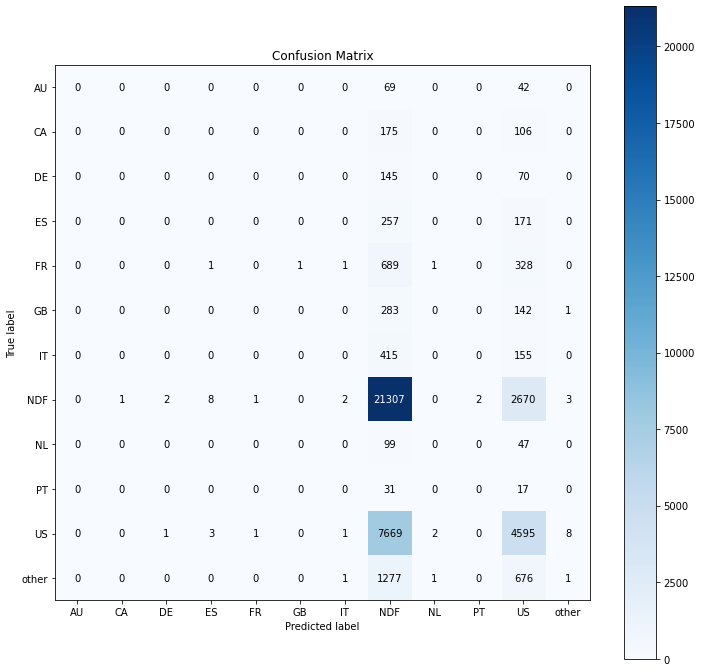

In [29]:
#Accuracy
acc_nn = m.accuracy_score( y_test_nn, y_hat_nn )
print('Accuracy :{}'.format(acc_nn))

# Balanced accuracy
balanced_accuracy_nn = m.balanced_accuracy_score(y_test_nn, y_hat_nn)
print('Balanced accuracy : {}'.format( balanced_accuracy_nn ))


# Kappa Metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, y_hat_nn)
print('kappa score : {}'.format( kappa_nn ))

# classification report
print(m.classification_report( y_test_nn, y_hat_nn ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test_nn, y_hat_nn, normalize=False , figsize=(12,12) )


### 6.1.3 NN Performance - Cross Validation

In [30]:
# Generate k-fold
num_folds = 5 
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True ,random_state=32)
kfold.split( x_train, y_train )


balanced_acc_list = [] 
kappa_acc_list    = []

i = 1
for train_ix, val_ix in kfold.split(x_train,y_train):
    print('Fold Number : {}/{}'.format( i , num_folds ))
    # get fold
    x_train_fold  = x_train.iloc[train_ix]
    y_train_fold  = y_train.iloc[train_ix]
    
    x_val_fold    = x_train.iloc[val_ix]
    y_val_fold    = y_train.iloc[val_ix]
    
    # Target Definition
    
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform( y_train_fold.values.reshape( -1,1 ) ).toarray()

    
    # Model definition
    model = ml.Sequential()
    model.add( l.Dense( 256, input_dim=x_train.shape[1], activation='relu' ) )
    model.add( l.Dense( 12,  activation='softmax') )
    
    # Compile Model
    model.compile( loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])    
    
    
    # Trainig model 
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32,verbose=0 )
    
    
    # Prediction
    pred_nn  = model.predict(x_val_fold)
    y_hat_nn = ohe.inverse_transform(pred_nn)
    
    
    #prepare data
    y_test_nn  = y_val_fold.to_numpy()
    y_hat_nn  = y_hat_nn.reshape( 1 , -1 )[0]
    
    # Metrics
    ## Balanced Accuracy
    balanced_acc_nn   =  m.balanced_accuracy_score( y_test_nn, y_hat_nn)
    balanced_acc_list.append(balanced_acc_nn) 
    ## Kappa Metrics
    kappa_acc_nn    =  m.cohen_kappa_score( y_test_nn, y_hat_nn)
    kappa_acc_list.append( kappa_acc_nn )
    
    
    i+=1

Fold Number : 1/5
Fold Number : 2/5
Fold Number : 3/5
Fold Number : 4/5
Fold Number : 5/5


In [31]:
print('Avg Balanced accuracy: {}  +/- {}'.format(np.round( np.mean( balanced_acc_list ),3),
                                                 np.round(np.std  ( balanced_acc_list ),4)))
print('Avg Kappa:             {}  +/- {}'.format( np.round ( np.mean ( kappa_acc_list ),3 ),
                                                  np.round ( np.std  ( kappa_acc_list ),3 ) ))

Avg Balanced accuracy: 0.106  +/- 0.0008
Avg Kappa:             0.226  +/- 0.007
